In [26]:
from trajectory.ptg import JMT

(2.5, 0.35361154879133383, 1, 0.9050397707586728, 0)


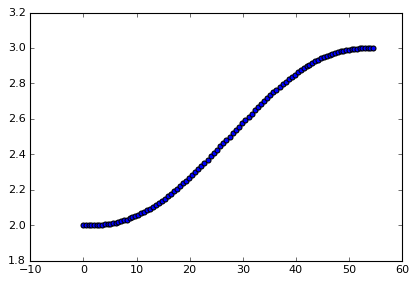

In [99]:
T=2.5

start_s=(0,20,0)
end_s=[T*20+5,20,0]

start_d=(2,0,0)
end_d=(3,0,0)


jmts=JMT(start_s, end_s, T), JMT(start_d, end_d, T)
traj=(jmts[0],jmts[1],T)
print (T, total_jerk_cost(traj), max_jerk_cost(traj), total_accel_cost(traj), max_accel_cost(traj))

cnt_points=100
points=np.zeros((cnt_points,2), dtype=np.float)

for i in range(cnt_points):
    t=T*float(i)/cnt_points
    
    s=sum([jmts[0][j]*t**j for j in range(6)])
    d=sum([jmts[1][j]*t**j for j in range(6)])
    points[i]=[s,d]
    
plt.scatter(points[:,0],points[:,1])
plt.show()



In [28]:
jmts=JMT(start_s, end_s, T), JMT(start_d, end_d, T)

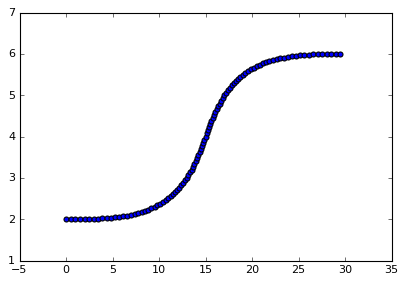

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

cnt_points=100
points=np.zeros((cnt_points,2), dtype=np.float)

for i in range(cnt_points):
    t=2.5*float(i)/cnt_points
    
    s=sum([jmts[0][j]*t**j for j in range(6)])
    d=sum([jmts[1][j]*t**j for j in range(6)])
    points[i]=[s,d]
    
plt.scatter(points[:,0],points[:,1])
plt.show()

In [89]:
from helpers import logistic, to_equation, differentiate, nearest_approach_to_any_vehicle, get_f_and_N_derivatives
from constants import *

def total_jerk_cost(traj):
    s, d, t = traj
    T=t
    res=0
    for q in (s,d):
        s_dot = differentiate(q)
        s_d_dot = differentiate(s_dot)
        jerk = to_equation(differentiate(s_d_dot))
        total_jerk = 0
        dt = float(T) / 100.0
        for i in range(100):
            t = dt * i
            j = jerk(t)
            total_jerk += abs(j*dt)
        jerk_per_second = total_jerk / T
        res+=jerk_per_second
        
    return logistic(jerk_per_second / EXPECTED_JERK_IN_ONE_SEC )

def max_jerk_cost(traj):
    s, d, t = traj
    T=t
    res=0
    for q in (s,d):
        s_dot = differentiate(q)
        s_d_dot = differentiate(s_dot)
        jerk = to_equation(differentiate(s_d_dot))
        total_jerk = 0
        dt = float(T) / 100.0
        for i in range(100):
            t = dt * i
            j = jerk(t)
            total_jerk = max(j, total_jerk)
        res+=total_jerk
        
    return  1 if res>MAX_JERK else 0

def total_accel_cost(traj):
    s, d, t = traj
    t=T
    s_dot = differentiate(s)
    s_d_dot = differentiate(s_dot)
    a = to_equation(s_d_dot)
    total_acc = 0
    dt = float(T) / 100.0
    for i in range(100):
        t = dt * i
        acc = a(t)
        total_acc += abs(acc*dt)
    acc_per_second = total_acc / T
    
    return logistic(acc_per_second / EXPECTED_ACC_IN_ONE_SEC )
    
def max_accel_cost(traj):
    s, d, t = traj
    t=T
    s_dot = differentiate(s)
    s_d_dot = differentiate(s_dot)
    a = to_equation(s_d_dot)
    all_accs = [a(float(T)/100 * i) for i in range(100)]
    max_acc = max(all_accs, key=abs)
    if abs(max_acc) > MAX_ACCEL: return 1
    else: return 0

In [65]:
max_jerk_cost

TypeError: max_jerk_cost() takes exactly 1 argument (0 given)

In [39]:
total_jerk_cost(traj)

(array([  0.    ,  20.    ,   0.    , -12.8   ,   7.68  ,  -1.2288]), [20.0, 0.0, -38.399999999999977, 30.71999999999997, -6.143999999999993], [0.0, -76.799999999999955, 92.159999999999911, -24.575999999999972])


0.9999992396376944

In [83]:
max_jerk_cost

<function __main__.max_jerk_cost>

In [91]:
s, d, t = traj
t=T
s_dot = differentiate(s)
s_d_dot = differentiate(s_dot)
a = to_equation(s_d_dot)
total_acc = 0
dt = float(T) / 100.0
for i in range(100):
    t = dt * i
    acc = a(t)
    total_acc += abs(acc*dt)
acc_per_second = total_acc / T


In [94]:
s_d_dot

[0.0, 0.0, 0.0, 0.0]

In [95]:
traj

(array([  0.,  20.,   0.,   0.,   0.,   0.]),
 array([ 2.     ,  0.     ,  0.     ,  0.64   , -0.384  ,  0.06144]),
 2.5)